In [1]:
# Iris data set contains the measurement of sepal_length, sepal_width, petal_length, petal_width 
# of 3 kind of flowers setosa, versicolor ans virginica
from sklearn.datasets import load_iris


In [124]:
iris = load_iris()

In [3]:
X = iris.data
Y = iris.target

In [4]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [31]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [25]:
# Grab data
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
# Grab Target
iris_target = DataFrame(Y,columns=['Species'])

In [148]:
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [147]:
iris_target.head()


,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [26]:
# iris_target shows species categorized in 0,1,2
# we will define a naming function and apply to the column 

def flower(num):
    '''takes a numerical value and returns flower name'''
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else: 
        return 'Virginica'
    
# apply the function
iris_target['Species'] = iris_target['Species'].apply(flower)

In [11]:
# check iris_target again
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


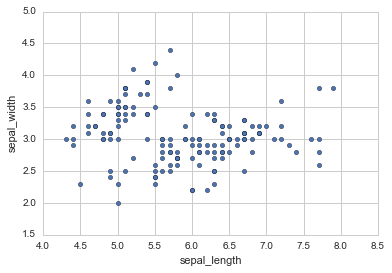

In [158]:
# Data Visualization
# 1. The first way we can make a scatter plot
iris = sns.load_dataset("iris")

iris.plot(kind="scatter", x="sepal_length", y="sepal_width")


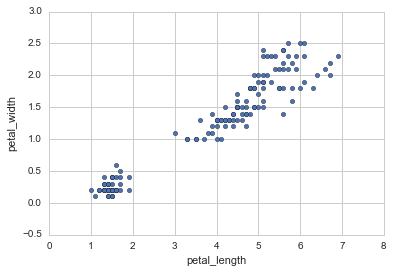

In [159]:
iris.plot(kind="scatter", x="petal_length", y="petal_width")

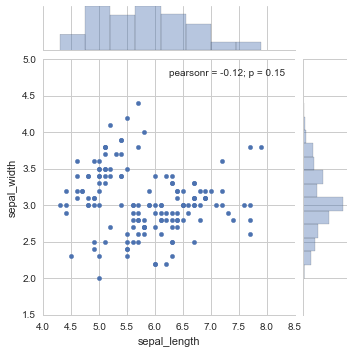

In [161]:
# 2. We can also make bivariate scatterplot and univariate histograms in the same figure
sns.jointplot(x='sepal_length',y='sepal_width',data=iris,size=5)

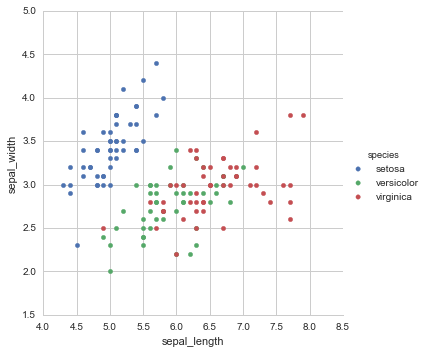

In [166]:
# All the above plots do not specify the 'species' information

# 3. We will use seaborn's FacetGrid to show that information by color

sns.FacetGrid(iris, hue='species',size=5) \
    .map(plt.scatter,'sepal_length','sepal_width') \
    .add_legend()


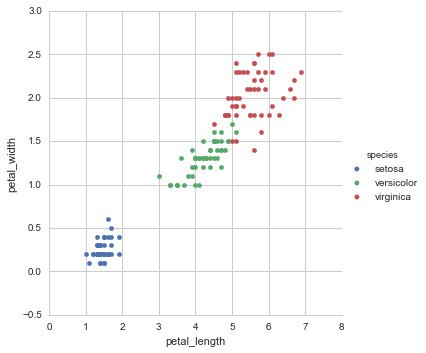

In [167]:
sns.FacetGrid(iris, hue='species',size=5) \
    .map(plt.scatter,'petal_length','petal_width') \
    .add_legend()

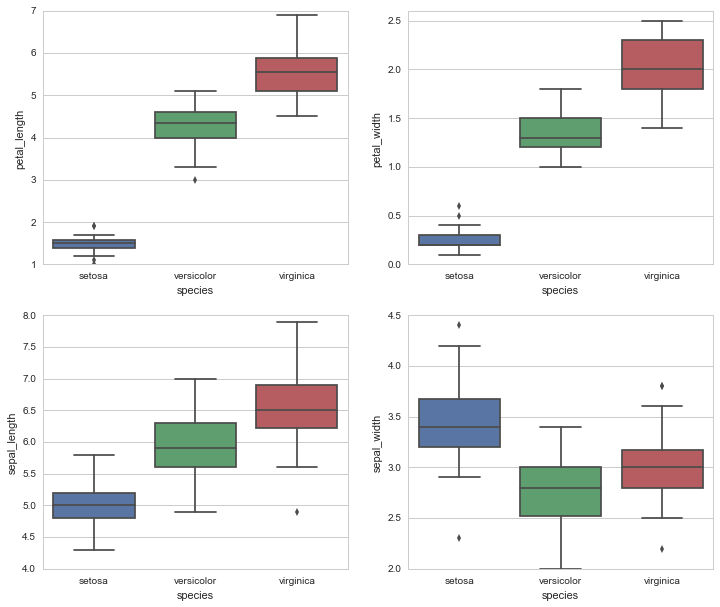

In [179]:
# 4. we can check the individual feature through boxplot
fig = plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.boxplot(x='species',y='petal_length',data=iris)

plt.subplot(2,2,2)
sns.boxplot(x='species',y='petal_width',data=iris)
plt.ylim(0,2.6)

plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal_length',data=iris)

plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal_width',data=iris)

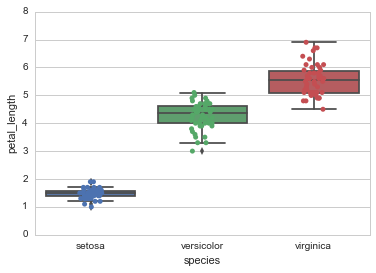

In [180]:
# We can add individual points on top of above plot using stripplot
sns.boxplot(x='species',y='petal_length',data=iris)
sns.stripplot(x='species',y='petal_length',data=iris,jitter=True)

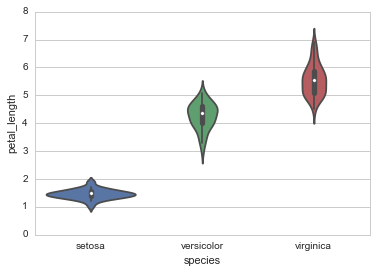

In [181]:
# A violin plot simplifies the above plot by combining them

sns.violinplot(x='species',y='petal_length',data=iris,size=6)

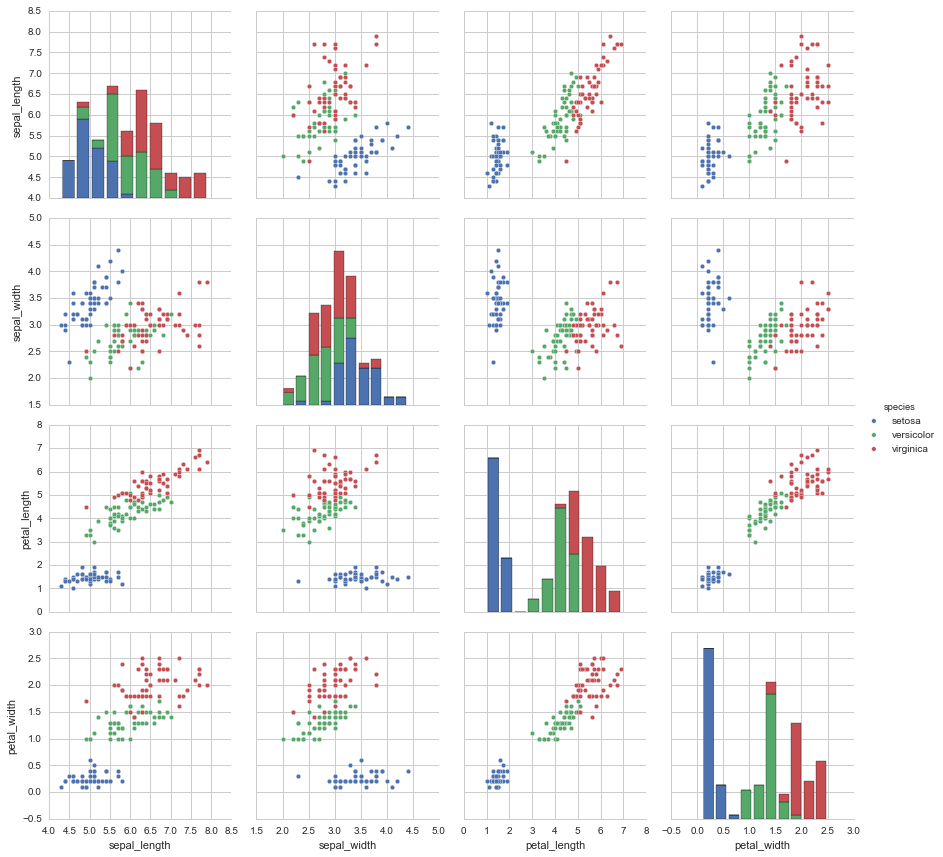

In [186]:
# Pair plot

iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", size=3);


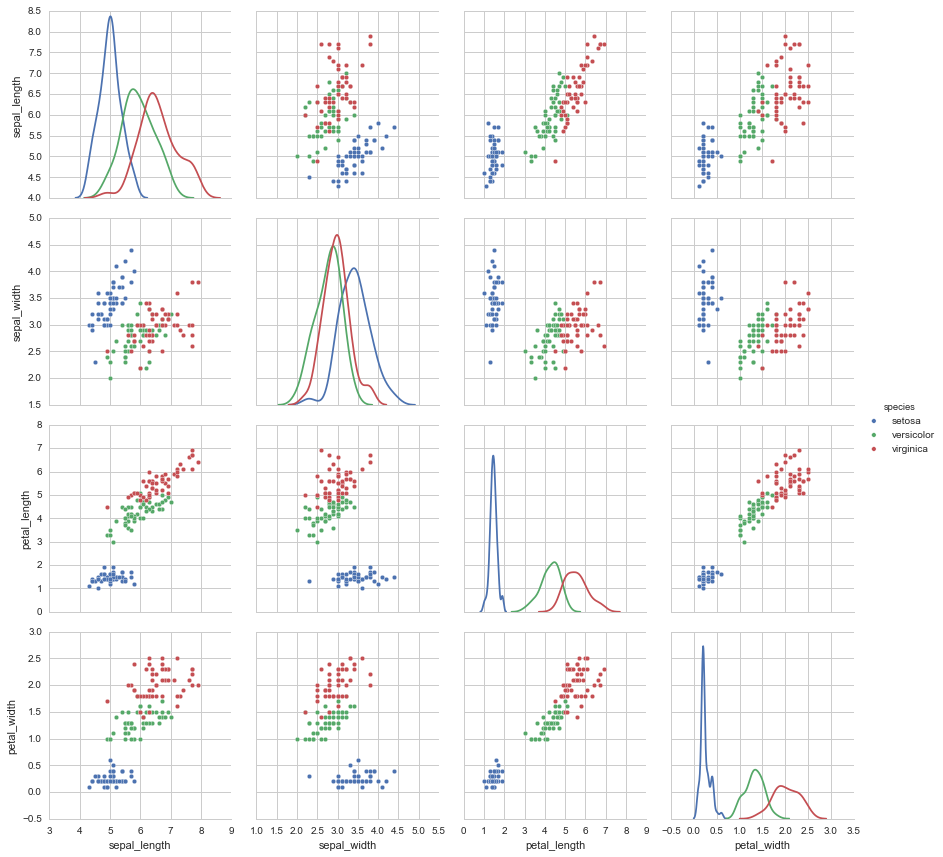

In [185]:
# We can create kde plot alog the diagonal
sns.pairplot(iris,hue="species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12818910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12EB96B0>]], dtype=object)

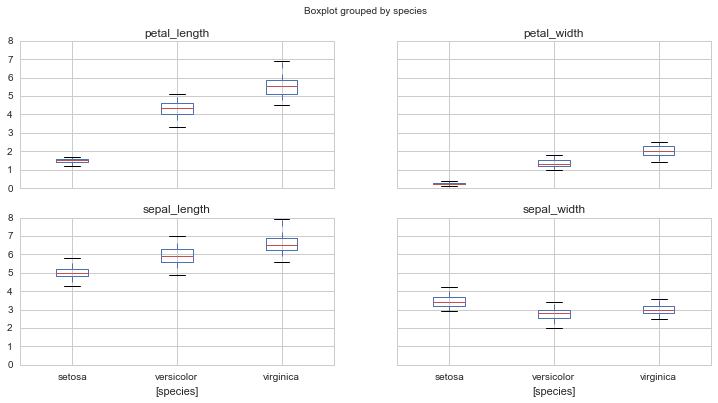

In [188]:
# boxplot split out by species
iris.boxplot(by="species", figsize=(12, 6))

In [48]:
# Because the our response variable is categorical(0,1,2 for 3 species), this is classification problem
# 1. Multi-class classification with Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# create logistic regression class object
logreg = LogisticRegression()

# Split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4)

# Train the model with the training set
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
# import the testing metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Prediction from X_test
Y_pred = logreg.predict(X_test)

# Ccheck accuracy
print metrics.accuracy_score(Y_test,Y_pred)


0.916666666667


In [ ]:
# The model is 91% accurate.


In [36]:
# 2. kNN with Scikit Learn
# Because the our response variable is categorical(0,1,2 for 3 species), this is classification problem
# so K-nearest neighbors classification (KNN) is good selection
# choooses a k value and compute the nearest distance for the unknown iris

# verify the shape of variables
print X.shape
print Y.shape

(150, 4)
(150,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# We'll start with k=1
knn = KNeighborsClassifier(n_neighbors = 1)


In [52]:
# fit the data
knn.fit(X_train,Y_train)

# Run the prediction
Y_pred = knn.predict(X_test)

# Check accuracy against the testing set
print metrics.accuracy_score(Y_test,Y_pred)

0.933333333333


In [55]:
# with k = 1, the model is 93% accurate

# we will choose k = 5
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)

print metrics.accuracy_score(Y_test,Y_pred)

0.966666666667


In [109]:
# with k=5, the accuracy of the model increases to 96%

# next we test the k values 1 through 20
k_range = range(1, 26)
# set an empty list
score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(Y_test, Y_pred))
    


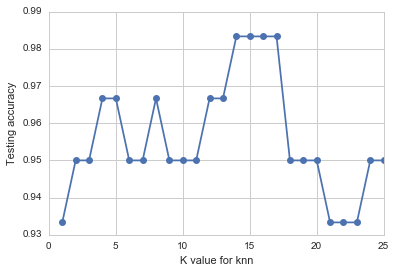

In [115]:
#print(accuracy_score)
plt.plot(k_range, score,marker='o')
plt.xlabel('K value for knn')
plt.ylabel('Testing accuracy')
    
    


In [93]:
# The highest accuracy of 98.3% for the k value 14, 15, 16, 17
#  so we choose k=15, and fit the model and make a prediction.

numpy.ndarray